# HW/ Exercise From Yesterday

# Warm-Up Exercise For Today

A cesear cipher is a simple cipher that shifts four letters to the left. Julius Cesear used to use this cipher for his personal correspondence in ancient rome. 
https://en.wikipedia.org/wiki/Caesar_cipher

i.e. 
Plaintext:  THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG
Ciphertext: QEB NRFZH YOLTK CLU GRJMP LSBO QEB IXWV ALD

- part 1
Write a function that computes the cesear cipher of a message (example above)

- part 2 BONUS
Write a function that takes a number and a direction (left or right) and creates a cipher from these parameters 
i.e. 
n=6, shift=right

Plaintext: A Dog 
Ciphertext: G JUM 


## SQL Indexes


MySQL uses indexes to quickly find rows with specific column values. Without an index, MySQL must scan the whole table to locate the relevant rows. The larger table, the slower it searches.

## View Indexes of an existing table 
```
SHOW INDEXES FROM Album
``` 
or 
```
SHOW KEYS FROM Album
``` 

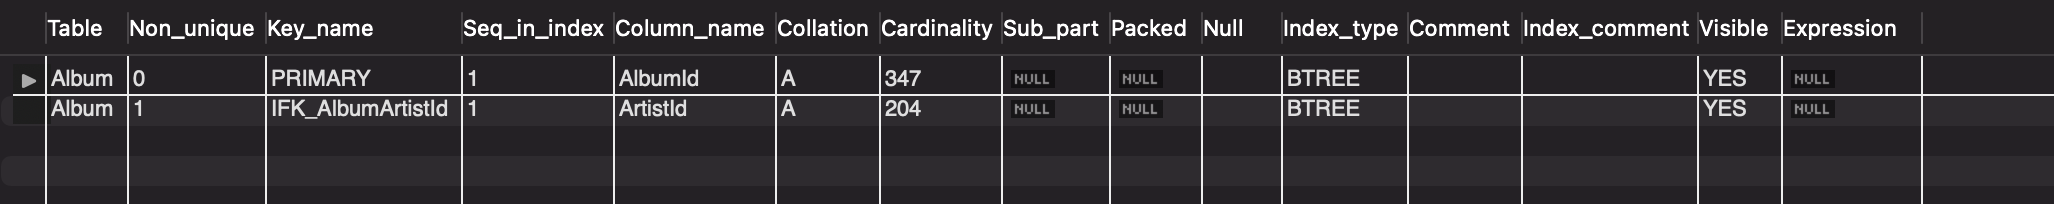 

- **non_unique**: 
1 if the index can contain duplicates, 0 if it cannot.

- **key_name**: 
The name of the index. The primary key index always has the name of PRIMARY.

- **seq_in_index**: 
The column sequence number in the index. The first column sequence number starts from 1.

- **collation: 
Collation represents how the column is sorted in the index. A means ascending, B means descending, or NULL means not sorted.

- **cardinality: The cardinality returns an estimated number of unique values in the index.
Note that the higher the cardinality, the greater the chance that the query optimizer uses the index for lookups.

- **sub_part**:
The index prefix. It is null if the entire column is indexed. Otherwise, it shows the number of indexed characters in case the column is partially indexed.

- **packed**:
indicates how the key is packed; NUL if it is not.

- **null**:
YES if the column may contain NULL values and blank if it does not.

- **index_type**:
represents the index method used such as BTREE, HASH, RTREE, or FULLTEXT.

- **comment**:
The information about the index not described in its own column.

- **index_comment**:
shows the comment for the index specified when you create the index with the COMMENT attribute.

- **visible**:
Whether the index is visible or invisible to the query optimizer or not; YES if it is, NO if not.

- **expression**:
If the index uses an expression rather than column or column prefix value, the expression indicates the expression for the key part and also the column_name column is NULL.

## Why we need indexes

```
SELECT
    
FROM 
    country
WHERE 
    FirstName = 'Astrid' AND 
    last_name = 'Gruber';
```
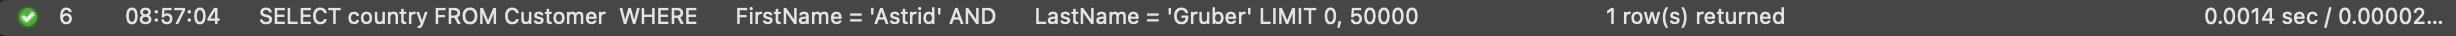
Although the query is fast, the database has to scan all the rows of the table until it finds the row. If the table has millions of rows, without an index, the data retrieval would take a lot of time to return the result.


## What is an index?
An index is a data structure such as B-Tree that improves the speed of data retrieval on a table at the cost of additional writes and storage to maintain it.

The query optimizer may use indexes to quickly locate data without having to scan every row in a table for a given query.

When you create a table with a primary key or unique key, MySQL automatically creates a special index named PRIMARY (also known as a clustered index)




## When is an index usually created? 

```
CREATE TABLE t(
   c1 INT PRIMARY KEY,
   c2 INT NOT NULL,
   c3 INT NOT NULL,
   c4 VARCHAR(10),
   INDEX (c2,c3) 
);
```

you can also use the create index function
```
CREATE INDEX index_name ON table_name (column_list)
```




## Example of using an index to speed up your query

**Example**:
```
SELECT country FROM Customer 
WHERE 
    FirstName = 'Astrid' AND 
    LastName = 'Gruber';
```


Use the EXPLAIN clause to see how many rows your query had to search through before finding the answer 


```
EXPLAIN SELECT country FROM Customer 
WHERE 
    FirstName = 'Astrid' AND 
    LastName = 'Gruber';
```
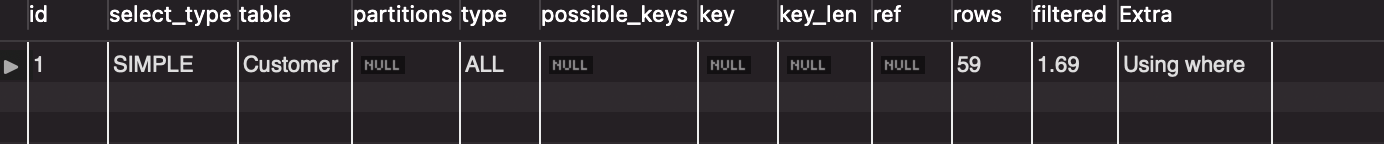






### Understanding the output of explain

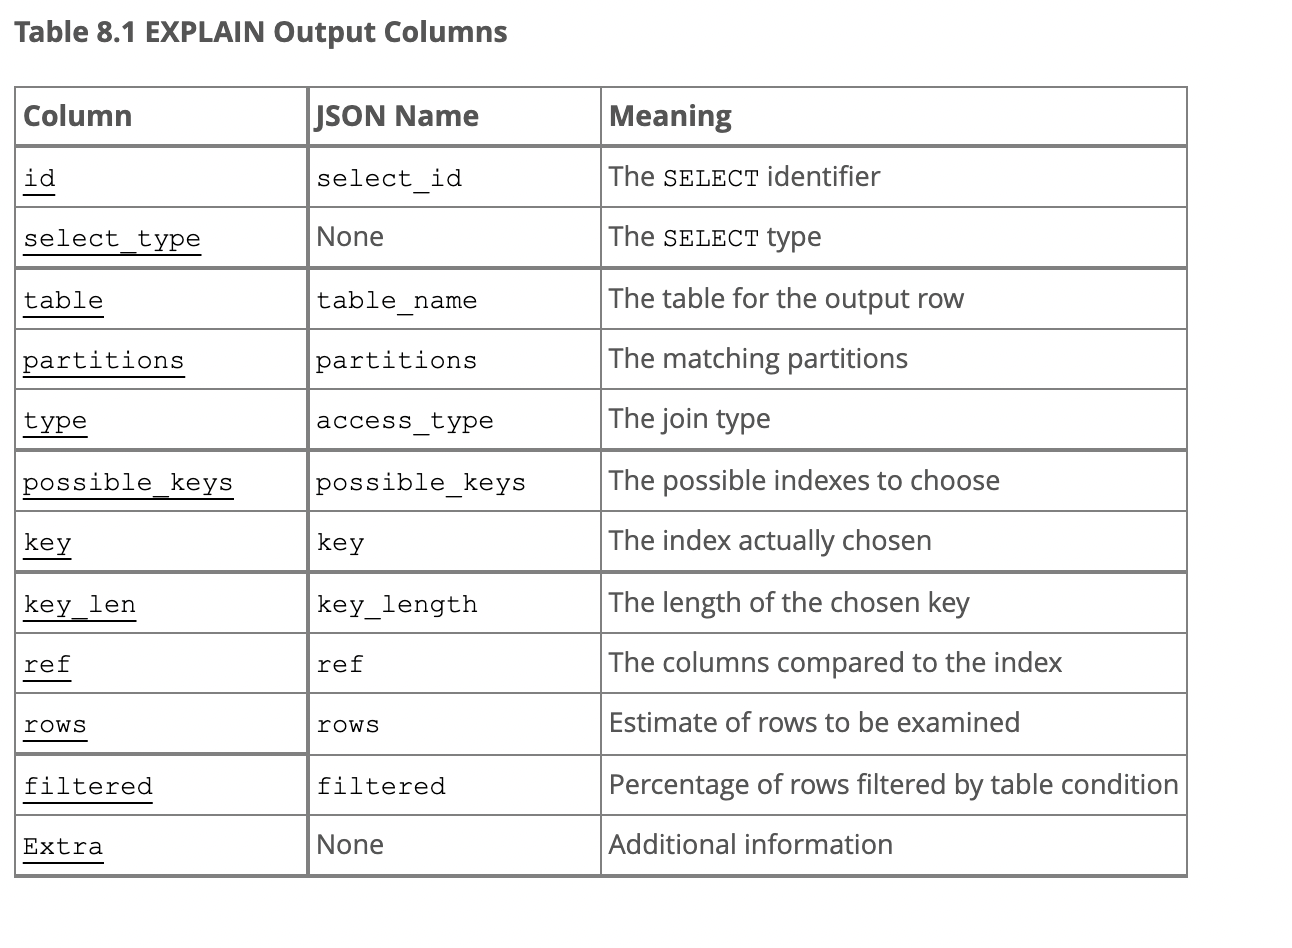

### creating a new key and re-running our example 
Index based on the first name using CREATE INDEX
```
CREATE INDEX FirstName ON Customer(FirstName);
```

Re-run our query 
```
EXPLAIN SELECT country FROM Customer 
WHERE 
    FirstName = 'Astrid' AND 
    LastName = 'Gruber';
```

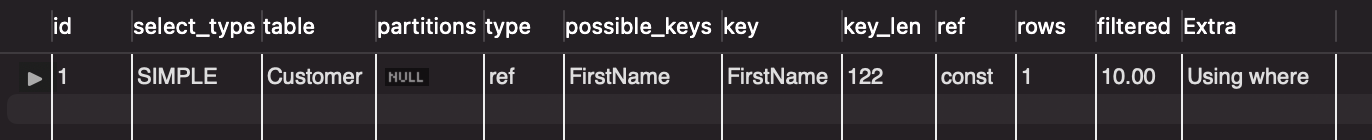

drop the index
```
DROP INDEX FirstName ON Customer;
```

# Intro to Webscraping


install beautiful soup
```
pip3 install beautifulsoup4
pip3 install requests

```


In [2]:
import sqlite3
import re
import requests
from bs4 import BeautifulSoup
    

## Getting started with Beautiful Soup

In [20]:
from bs4 import BeautifulSoup
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())


<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


## Beautiful Soup Attributes

In [38]:
#soup.head
#soup.title
#soup.body.b
#soup.a
#soup.find_all('a')


## Parsing a URL using requests 

In [13]:
#https://www.imdb.com/chart/top/
url = 'https://www.imdb.com/chart/top/'
result = requests.get(url)
soup = BeautifulSoup(result.content, 'html.parser')

print(soup.prettify())


<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

## parsing out movie titles from imdb top films

In [9]:
url = 'https://www.imdb.com/chart/top/'
result = requests.get(url)
soup = BeautifulSoup(result.content, 'html.parser')

for entry in soup.findAll('table')[0].findAll('a'):
    if entry:
        print(entry.get_text())
    
        print(entry.get('title'))

 

None
The Shawshank Redemption
Frank Darabont (dir.), Tim Robbins, Morgan Freeman
 

None
The Godfather
Francis Ford Coppola (dir.), Marlon Brando, Al Pacino
 

None
The Godfather: Part II
Francis Ford Coppola (dir.), Al Pacino, Robert De Niro
 

None
The Dark Knight
Christopher Nolan (dir.), Christian Bale, Heath Ledger
 

None
12 Angry Men
Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb
 

None
Schindler's List
Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes
 

None
The Lord of the Rings: The Return of the King
Peter Jackson (dir.), Elijah Wood, Viggo Mortensen
 

None
Pulp Fiction
Quentin Tarantino (dir.), John Travolta, Uma Thurman
 

None
The Good, the Bad and the Ugly
Sergio Leone (dir.), Clint Eastwood, Eli Wallach
 

None
The Lord of the Rings: The Fellowship of the Ring
Peter Jackson (dir.), Elijah Wood, Ian McKellen
 

None
Fight Club
David Fincher (dir.), Brad Pitt, Edward Norton
 

None
Forrest Gump
Robert Zemeckis (dir.), Tom Hanks, Robin Wright
 

None
Inception
Chris

## Exercise:  
Use code above to populate mysql two tables called "Film" and "Ranking" (the first entry is ranked the highest, and the last the lowest), the ranking should have a foreign key called filmid, that points to the film id. 

In [2]:
import sqlite3
import re
import requests
from bs4 import BeautifulSoup

'''Importing and Formating Data From URL'''

url = 'https://www.imdb.com/chart/top/'
result = requests.get(url)
soup = BeautifulSoup(result.content, 'html.parser')

rankLi = list(range(1,251))
rankLi.reverse()
rankLi = [(str(x),) for x in rankLi]
# print(rankLi)
# rankLi = [('250',), ('249',), ('248',), ('247',), ('246',), ('245',), ('244',),...

movieLi =[]

for entry in soup.findAll('table')[0].findAll('a'):
    if entry:
        movieLi.append(str(entry.get_text()))
        # movieLi.append(str(entry.get('title')))

print(movieLi)
# movieLi = [' \n', 'None','Spirited Away', 'Hayao Miyazaki (dir.), Daveigh Chase, Suzanne Pleshette', ' \n', 'None', 'Interstellar', 'Christopher Nolan (dir.), Matthew McConaughey, Anne Hathaway'...

titleLi = []
for x in range(len(movieLi)):
    if movieLi[x] == "None":
        movieLi[x+1] = (movieLi[x+1],)
        titleLi.append(movieLi[x + 1],)

# print(titleLi)  
# titleLi = [('The Shawshank Redemption',), ('The Godfather',), ('The Godfather: Part II',), ('The Dark Knight',), ('12 Angry Men',)...      

'''Connecting to MySQL and Creating Tables'''

import mysql.connector
from dotenv import dotenv_values

config = dotenv_values(".env")  

mydb = mysql.connector.connect(
  host=config['HOST'],
  user=config['USER'],
  password=config['PASSWORD'],
  database=config['DATABASE'])

# mydb = mysql.connector.connect(
#   host='localhost',
#   user='root',
#   password='Rdekr719',
#   database='Chinook'
# )

mycursor = mydb.cursor()
mycursor.execute('Create Database If Not Exists MovieRank;')

mycursor.execute('Use MovieRank;')
mycursor.execute('Drop Table if Exists Ranking;')
mycursor.execute('Drop Table if Exists Film;')

mycursor.execute('''Create Table If Not Exists Film 
(
FilmID      INT     Not Null    Auto_Increment    Primary Key,
FilmName    Varchar(250)    Not Null
);''')

mycursor.executemany('''INSERT Into Film (FilmName) VALUES (%s)''', titleLi)

# mycursor.execute('Drop Table if Exists Ranking;')
mycursor.execute('''Create Table If Not Exists Ranking
(
Ranking    INT     Not Null,
FilmID      INT     Not Null    Auto_Increment,
Constraint  fk_FilmID
Foreign Key (FilmID)
    References Film(FilmID)
        On Update Cascade
        On Delete Cascade);
''') 


mycursor.executemany('''INSERT Into Ranking (Ranking) VALUES (%s)''', rankLi)

mydb.commit()
# mycursor.executemany('Select * From Ranking')
# for x in mycursor:
#   print(x)
mydb.close()

[' \n', 'The Shawshank Redemption', ' \n', 'The Godfather', ' \n', 'The Godfather: Part II', ' \n', 'The Dark Knight', ' \n', '12 Angry Men', ' \n', "Schindler's List", ' \n', 'The Lord of the Rings: The Return of the King', ' \n', 'Pulp Fiction', ' \n', 'The Good, the Bad and the Ugly', ' \n', 'The Lord of the Rings: The Fellowship of the Ring', ' \n', 'Fight Club', ' \n', 'Forrest Gump', ' \n', 'Inception', ' \n', 'The Lord of the Rings: The Two Towers', ' \n', 'Star Wars: Episode V - The Empire Strikes Back', ' \n', 'The Matrix', ' \n', 'Goodfellas', ' \n', "One Flew Over the Cuckoo's Nest", ' \n', 'Seven Samurai', ' \n', 'Se7en', ' \n', 'City of God', ' \n', 'The Silence of the Lambs', ' \n', 'Life Is Beautiful', ' \n', "It's a Wonderful Life", ' \n', 'Star Wars: Episode IV - A New Hope', ' \n', 'Saving Private Ryan', ' \n', 'Spirited Away', ' \n', 'Interstellar', ' \n', 'The Green Mile', ' \n', 'Parasite', ' \n', 'Léon: The Professional', ' \n', 'Hara-Kiri', ' \n', 'The Usual Susp

IntegrityError: 1452 (23000): Cannot add or update a child row: a foreign key constraint fails (`movierank`.`ranking`, CONSTRAINT `fk_FilmID` FOREIGN KEY (`FilmID`) REFERENCES `film` (`FilmID`) ON DELETE CASCADE ON UPDATE CASCADE)